<a href="https://colab.research.google.com/github/kiatkai96/Data-Science-Projects/blob/main/Attrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# For plotting and general statistics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# For Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, OrdinalEncoder
from xgboost import XGBClassifier
# SMOTE
from imblearn.over_sampling import SMOTE

# For Refactoring of codes using pipeline
# from sklearn.pipeline import Pipeline    # Pipeline from sklearn.pipeline does not support SMOTE directly as it expects all intermediate steps to be transformers.
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from mpl_toolkits.mplot3d import Axes3D
import itertools

pd.set_option('display.max_columns', None)
sns.set_style("darkgrid")

In [ ]:
df = pd.read_csv("/content/WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [ ]:
# There are no missing values in this data
print("Dataset Structure:")
df.info()

Dataset Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLe

In [ ]:
# There are no duplicated values
print("\nMissing Values:")
df.isnull().sum()


Missing Values:


Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [ ]:
df['Attrition'].value_counts()

Attrition
0    1233
1     237
Name: count, dtype: int64

# Create new features

In [ ]:
# Define a function to create 'Age Group' feature
def create_age_group(df):
    df['Age Group'] = pd.cut(df['Age'], bins=[0, 30, 40, 50, 60, float('inf')], labels=['20-30', '30-40', '40-50', '50-60', '60+'])
    return df

# Define a function to sort salary into different bands
def categorise_salary(salary):
    if salary < 3000:
        return 'Very Low'
    elif 3000 <= salary < 5000:
        return 'Low'
    elif 5000 <= salary < 5000:
        return 'Medium'
    elif salary >= 8000:
        return 'High'

# Apply feature engineering functions to the data
df['MonthlyIncome_bin'] = df['MonthlyIncome'].apply(categorise_salary)
df = create_age_group(df)

In [ ]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,MonthlyIncome_bin,Age Group
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,None,40-50
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,None,40-50
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,Very Low,30-40
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,Very Low,30-40
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,Low,20-30


# EDA

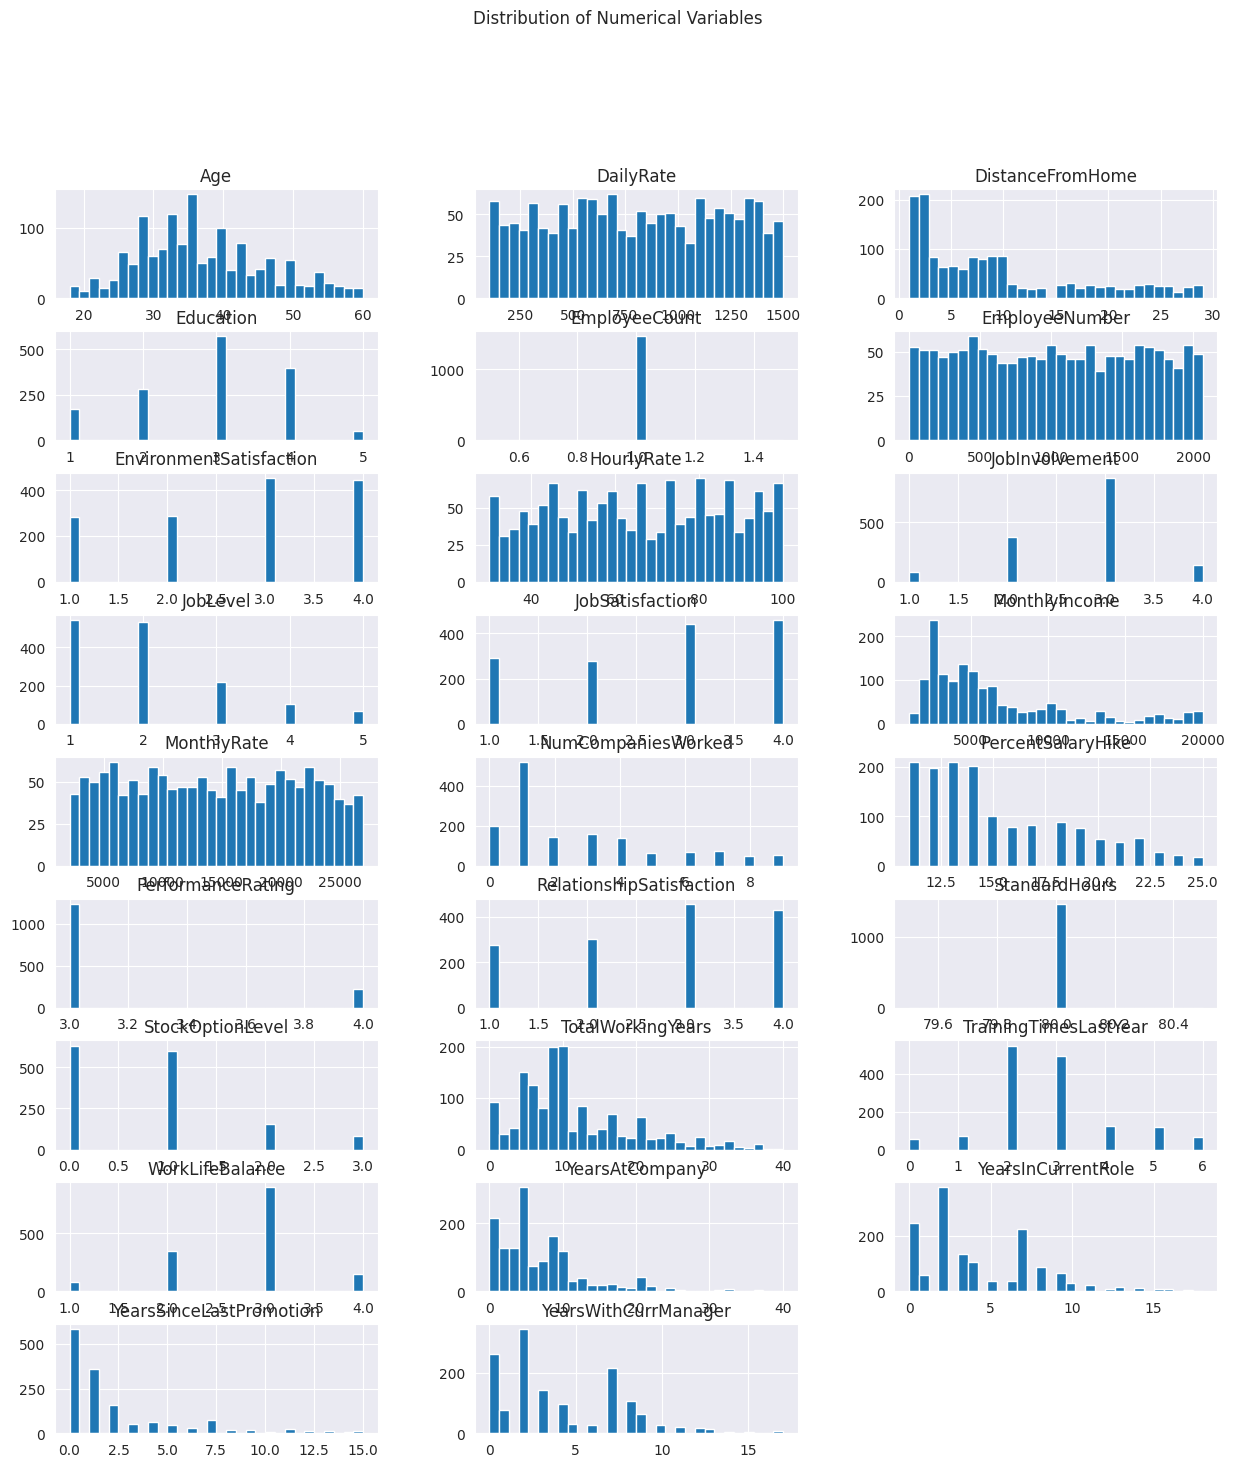

In [ ]:
# Distribution of numerical variables
numerical_cols = df.select_dtypes(include=np.number).columns
df[numerical_cols].hist(bins=30, figsize=(15, 18), layout=(10, 3))
plt.suptitle('Distribution of Numerical Variables')
plt.show()

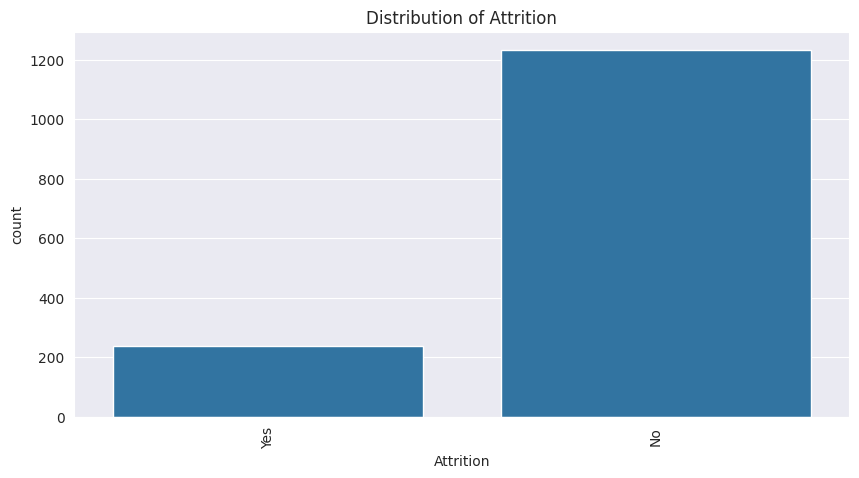

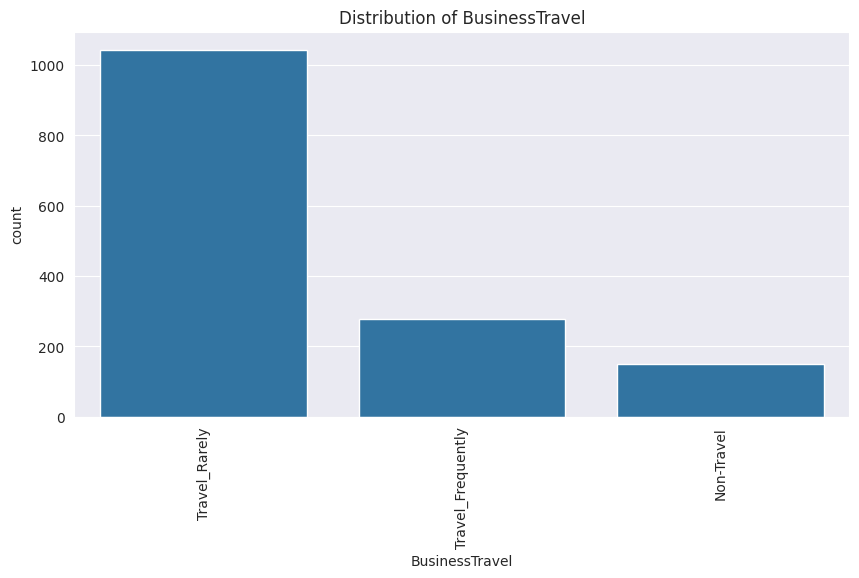

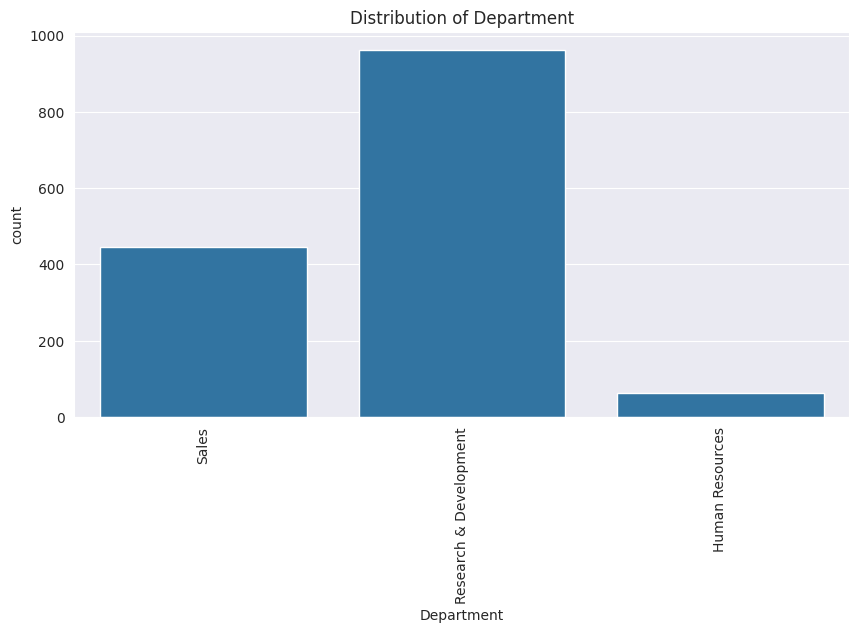

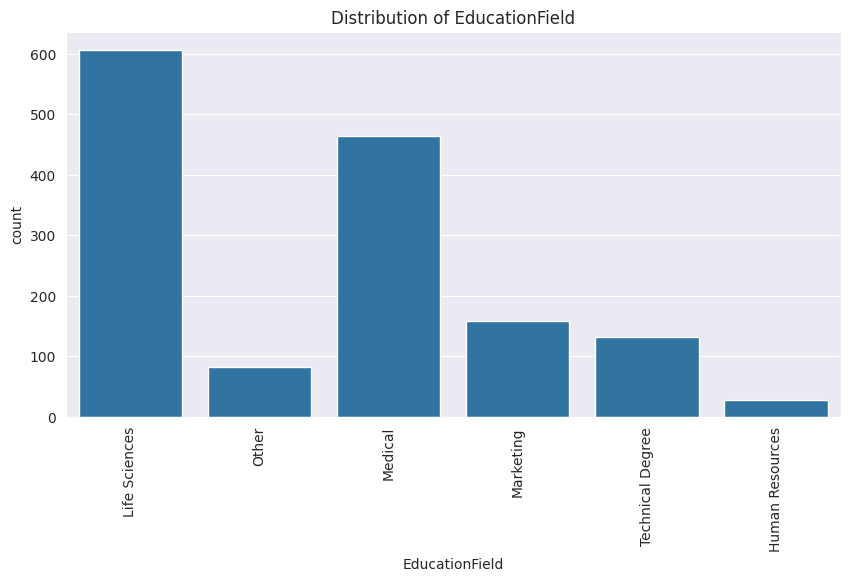

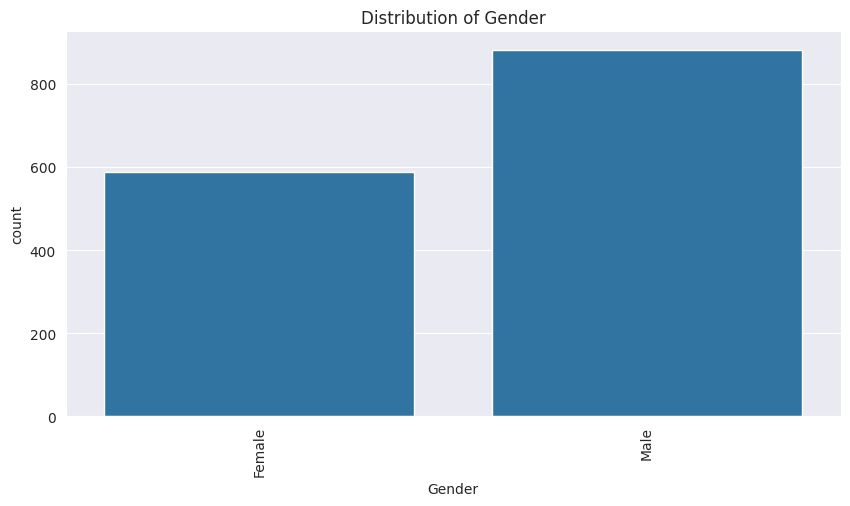

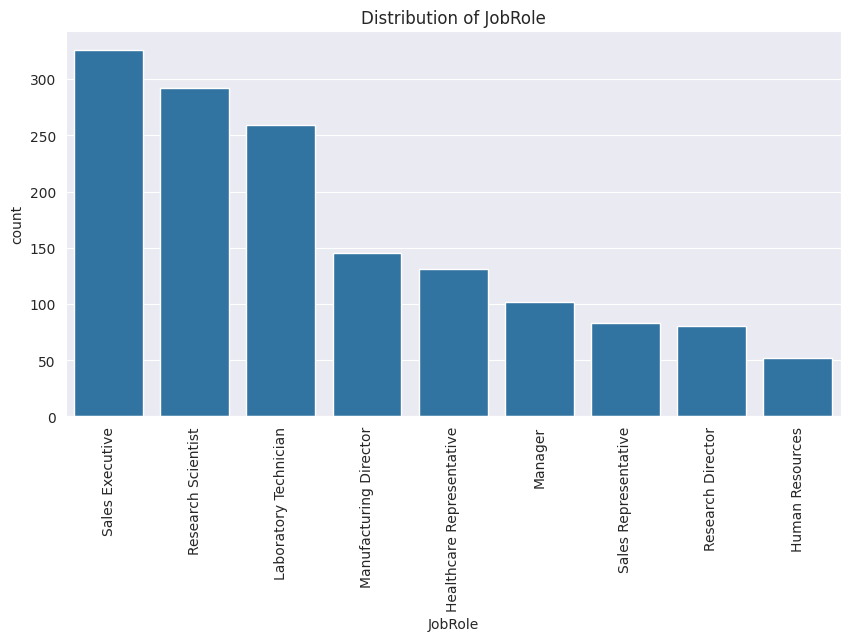

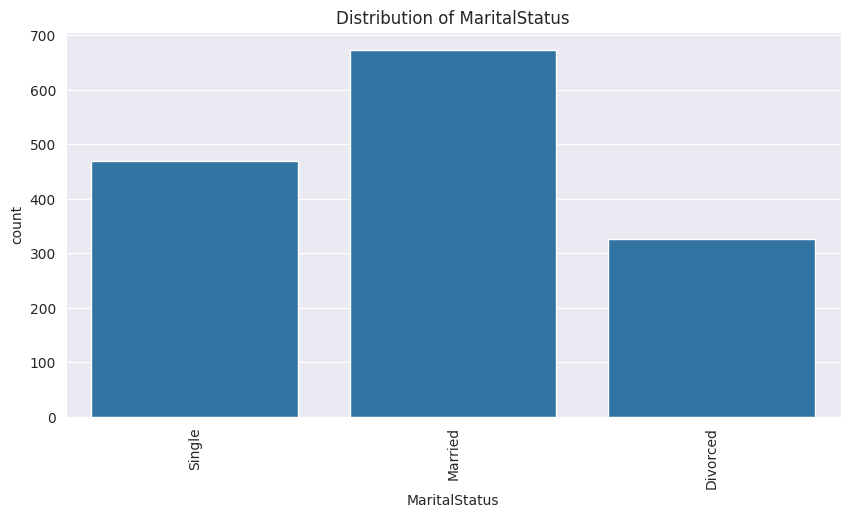

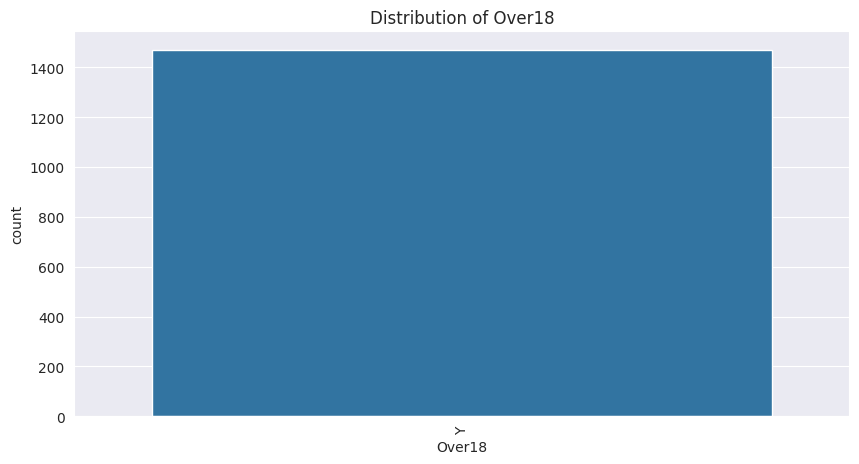

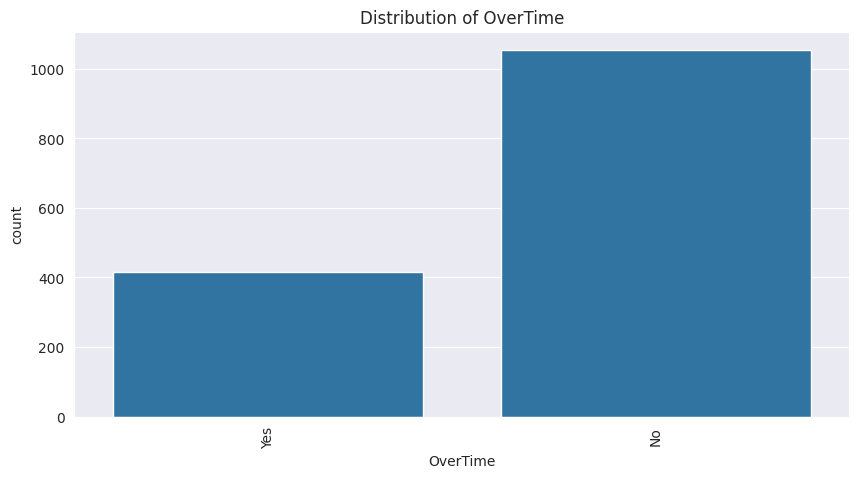

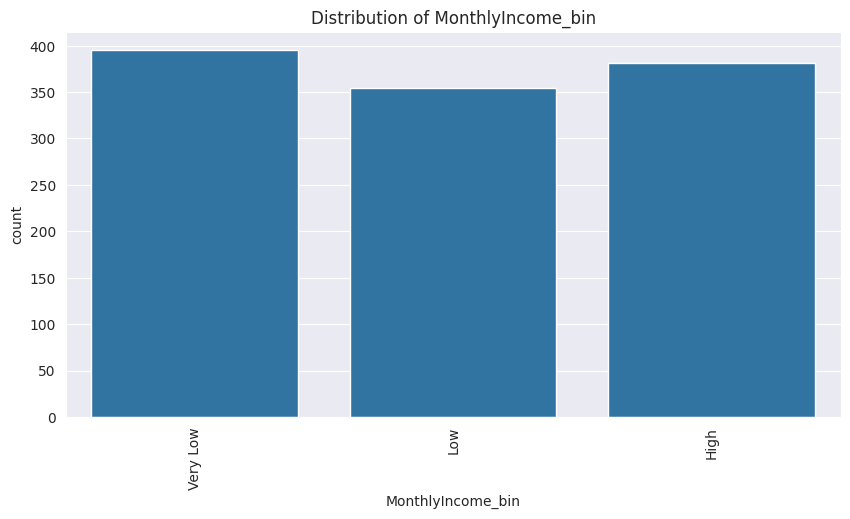

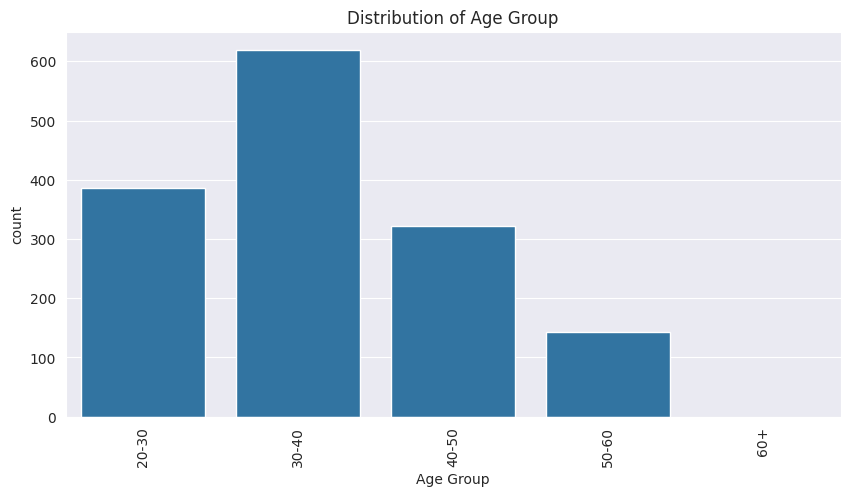

In [ ]:
# Distribution of categorical variables
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=90)
    plt.show()

# Correlation plot

- From the correlation plot, features ['JobLevel'] and ['MonthlyIncome'] are highly correlated. To drop ['JobLevel']

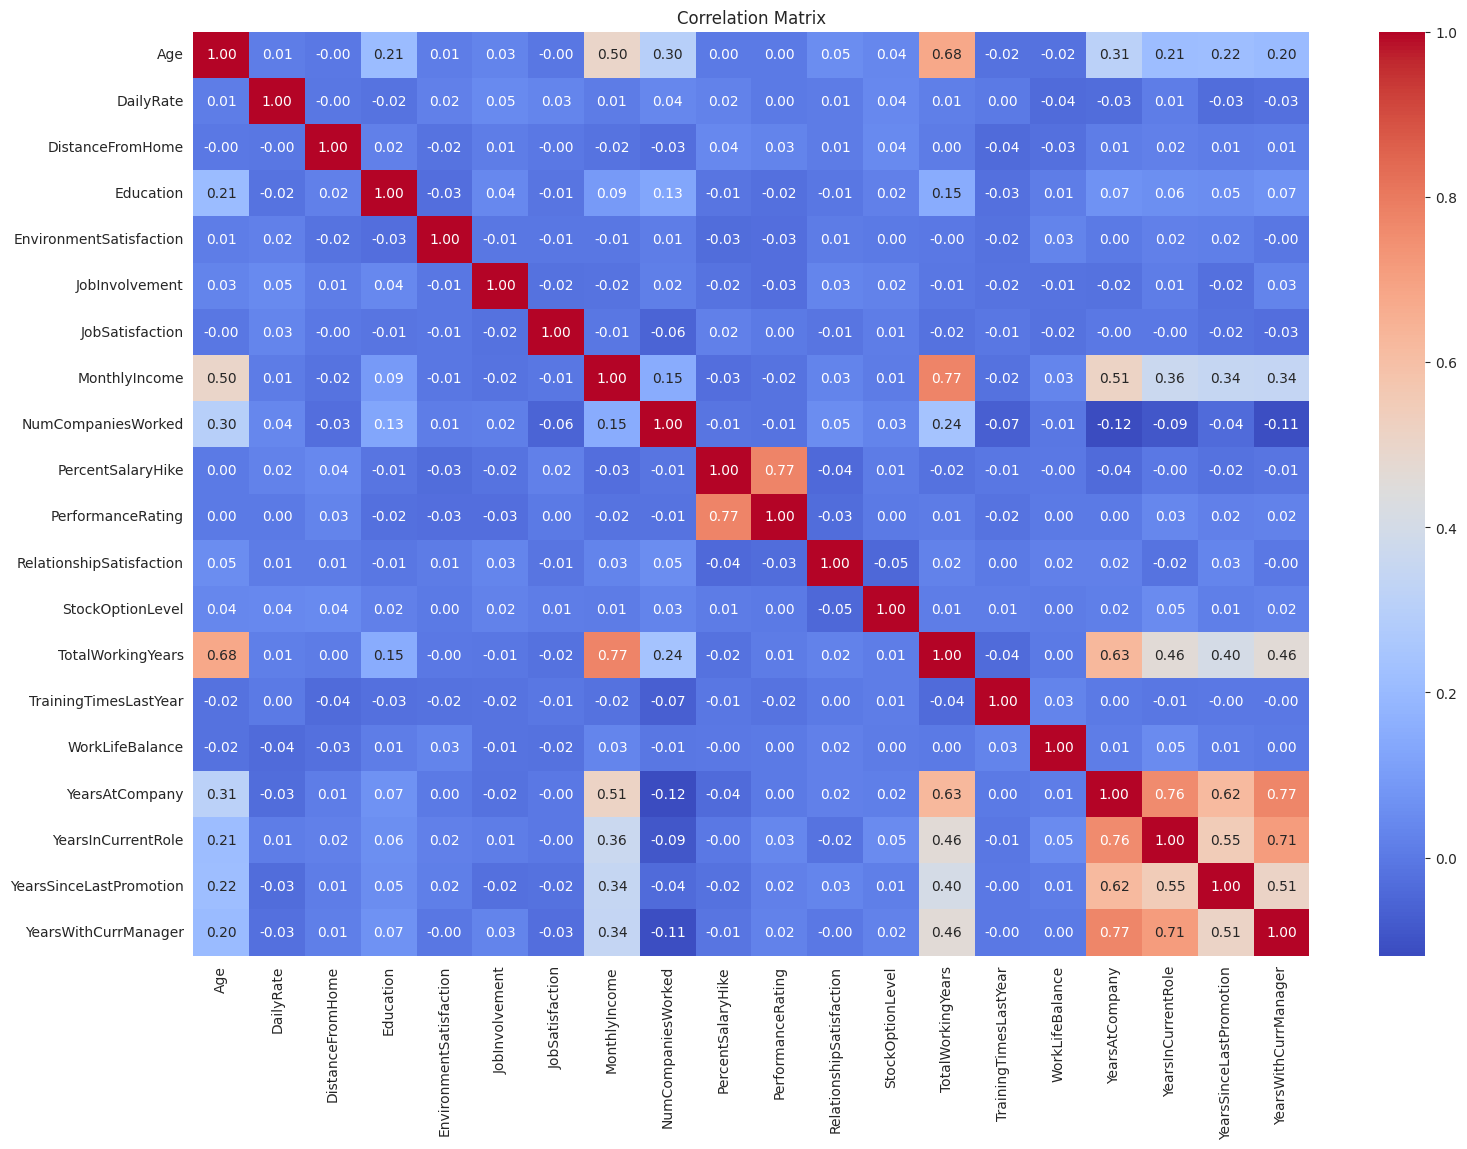

In [ ]:
numerical_cols = df.select_dtypes(include=np.number).columns

# Correlation matrix for numerical variables
plt.figure(figsize=(18, 12))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Drop
df.drop(['JobLevel'], axis=1, inplace=True)

# Drop unnecessary columns
df.drop(['EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18', 'HourlyRate', 'MonthlyRate'], axis=1, inplace=True)

In [ ]:
# Encode the target labels ("No": 0, "Yes": 1)
label_encoder = LabelEncoder()
df['Attrition'] = label_encoder.fit_transform(df['Attrition'])

# Separate our feature and target variables
X = df.drop('Attrition', axis=1)
y = df['Attrition']
X.shape, y.shape

((1470, 29), (1470,))

# SMOTE

- Since our models are performing poorly on the minority class (low recall, F1 score), SMOTE can help improve the model's ability to generalize to the minority class by providing more training examples.
- SMOTE is particularly useful when you have a severe class imbalance, as it helps the model learn more about the minority class. In your case, with 1233 instances of class 0 and 237 instances of class 1, you have a notable imbalance, making SMOTE a viable option

Benefits of Using SMOTE
- Improved Recall: SMOTE can improve recall for the minority class by providing more examples for the model to learn from.
- Better F1 Score: By improving recall, SMOTE often leads to a better F1 score, which is crucial when dealing with imbalanced datasets.
- Balanced Training: A more balanced training set can help the model understand the decision boundary between classes better.

Potential Drawbacks
- Overfitting: Generating synthetic samples might lead to overfitting, especially if the synthetic samples are very similar to the existing ones.
- Increased Computation: The process of generating synthetic samples and training on a larger dataset can increase computation time.

# Random Forest Classifier

In [ ]:
################################################################################
############   REFACOTRING OF CODES USING PIPELINES WITH SMOTE #################
################################################################################

# Columns to be encoded
categorical_features = ['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','Age Group','MonthlyIncome_bin','OverTime']
# Columns to be scaled
numerical_features = X.columns.difference(categorical_features)

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('OneHotEncoder', OneHotEncoder(handle_unknown='ignore'))
])

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Bundle preprocessing for categorical and numerical data
preprocessor = ColumnTransformer(
    transformers = [
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Create the pipeline with preprocessing step, SMOTE, and classifier:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=15, sampling_strategy='auto')),
    ('classifier', RandomForestClassifier(random_state=10))
])

# Train test split:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 10)


# Print value counts of y_train before SMOTE
print("\nValue counts of y_train before SMOTE:")
print(y_train.value_counts())

# Apply the preprocessing and SMOTE steps manually to print the value counts after SMOTE
X_train_preprocessed = preprocessor.fit_transform(X_train)
smote = SMOTE(random_state=15)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_preprocessed, y_train)

# Print value counts of y_train after SMOTE
print("\nValue counts of y_train after SMOTE:")
print(y_train_resampled.value_counts())



# Define the parameter grid for GridSearchCV:
params_grid = {
    'classifier__n_estimators':[100, 500, 1000],
    'classifier__criterion':['gini', 'entropy'],
    'classifier__max_depth':[2, 4, 6],
    'classifier__min_samples_split' : [4,6],
    'classifier__max_leaf_nodes' : [30,40],
    'classifier__max_features':['log2']
}

# Define the scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'f1': make_scorer(f1_score),
    'roc_auc': 'roc_auc',
    'precision': make_scorer(precision_score, zero_division=0),
    'recall': make_scorer(recall_score, zero_division=0)
}

# Optimize hyperparameters using GridSearchCV:
# refit parameter in GridSearchCV controls which scoring metric is used to select the best estimator.
# Imbalanced Datasets: Since this dataset is imbalanced and we are concerned about the performance on the minority class,
# we should optimize for F1 score or recall.
grid_search = GridSearchCV(pipeline, param_grid=params_grid, scoring=scoring, refit='recall', cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("\n")
print(f'Best parameters found: {best_params} with training data')

# Accessing the scores for each metric
results = grid_search.cv_results_

print("\nBest CV Scores:")
for scorer in scoring:
  print(f"Best {scorer}: {grid_search.best_score_ if scorer =='accuracy' else max(results[f'mean_test_{scorer}'])}")

# Predict using the best found parameters and model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate additional scoring metrics
accuracy_result = accuracy_score(y_test, y_pred)
f1_result = f1_score(y_test, y_pred)
roc_auc_result = roc_auc_score(y_test, y_pred)
precision_result = precision_score(y_test, y_pred)
recall_result = recall_score(y_test, y_pred)
class_report =  classification_report(y_test, y_pred)

print("\nTest Set Scores:")
print(f"Accuracy: {accuracy_result}")
print(f"F1 Score: {f1_result}")
print(f"ROC AUC Score: {roc_auc_result}")
print(f"Precision: {precision_result}")
print(f"Recall: {recall_result}")
print("Classification Report:")
print(class_report)


Value counts of y_train before SMOTE:
Attrition
0    994
1    182
Name: count, dtype: int64

Value counts of y_train after SMOTE:
Attrition
0    994
1    994
Name: count, dtype: int64


Best parameters found: {'classifier__criterion': 'gini', 'classifier__max_depth': 2, 'classifier__max_features': 'log2', 'classifier__max_leaf_nodes': 30, 'classifier__min_samples_split': 4, 'classifier__n_estimators': 1000} with training data

Best CV Scores:
Best accuracy: 0.5223723723723724
Best f1: 0.489067603023412
Best roc_auc: 0.7901325491777753
Best precision: 0.6350850202429149
Best recall: 0.5223723723723724

Test Set Scores:
Accuracy: 0.8197278911564626
F1 Score: 0.5391304347826087
ROC AUC Score: 0.7211487257512361
Precision: 0.5166666666666667
Recall: 0.5636363636363636
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       239
           1       0.52      0.56      0.54        55

    accuracy                         

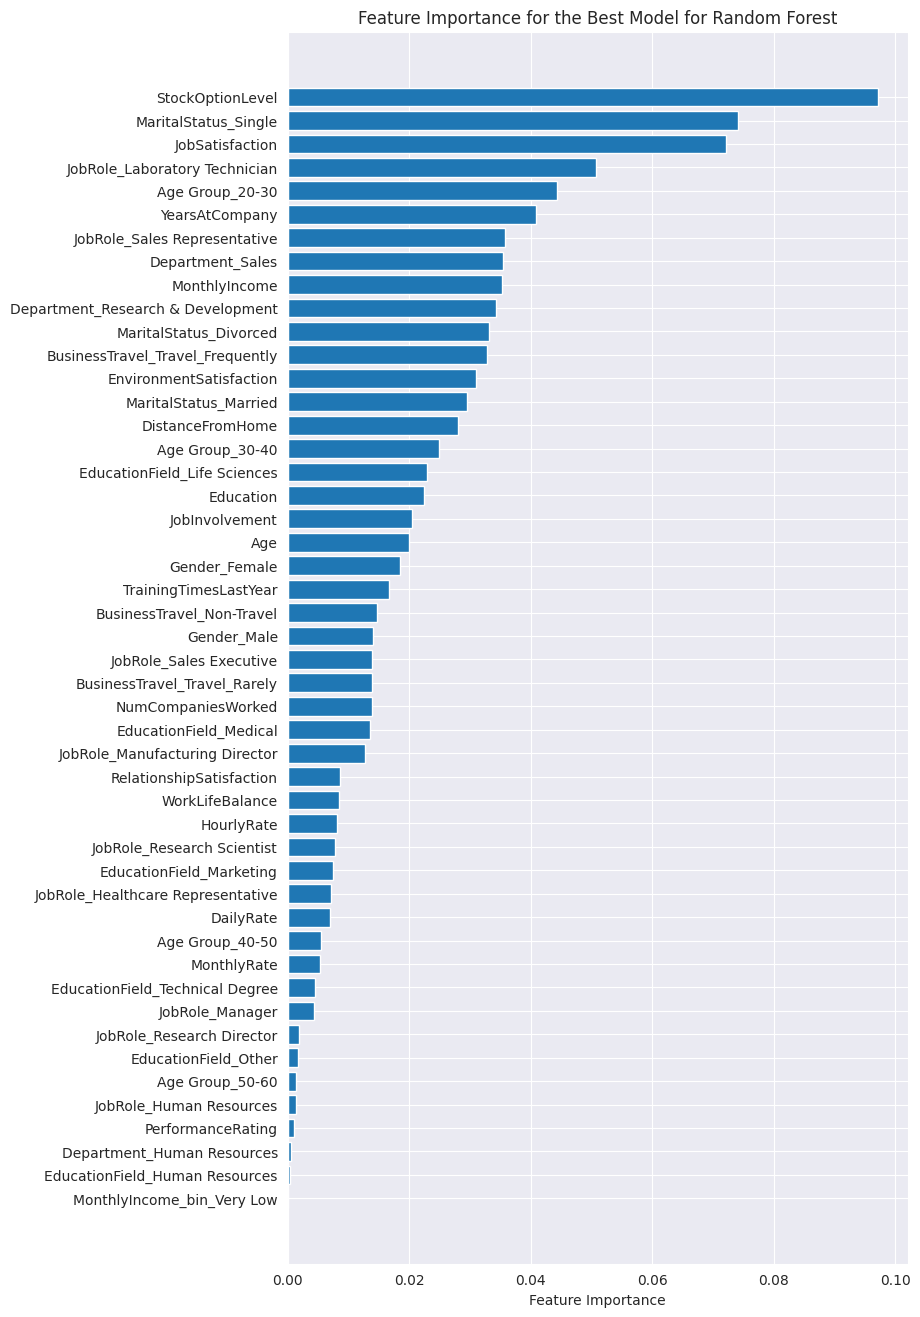

In [ ]:
# Extract feature importance
feature_importances = best_model.named_steps['classifier'].feature_importances_  # Accesses the RandomForestRegressor instance within your pipeline., then extract feature importances
# Get feature names after preprocessing
# Access the preprocessing step of the best model found by the grid search.
# Within the preprocessor, access the transformer applied to the categorical features. The 'cat' key refers to the categorical transformer defined in the ColumnTransformer.
# Within the categorical transformer pipeline, access the OneHotEncoder step. The step was named 'OneHotEncoder' in the pipeline definition.
onehot_feature_names = best_model.named_steps['preprocessor'].named_transformers_['cat']['OneHotEncoder'].get_feature_names_out(categorical_features)
feature_names = np.concatenate([numerical_features, onehot_feature_names])

# Sort features by importance
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# plot feature importances
plt.figure(figsize=(8,16))
plt.barh(range(len(sorted_feature_importances)), sorted_feature_importances, align='center')
plt.yticks(range(len(sorted_feature_importances)), sorted_feature_names)
plt.xlabel('Feature Importance')
plt.title('Feature Importance for the Best Model for Random Forest')
plt.gca().invert_yaxis()
plt.show()

# Decision Tree



Best parameters found: {'classifier__criterion': 'entropy', 'classifier__max_depth': None, 'classifier__max_features': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2} with training data

Best CV Scores:
Best accuracy: 0.3463963963963964
Best f1: 0.3693207943796646
Best roc_auc: 0.7015250975049969
Best precision: 0.5220436542862171
Best recall: 0.3463963963963964


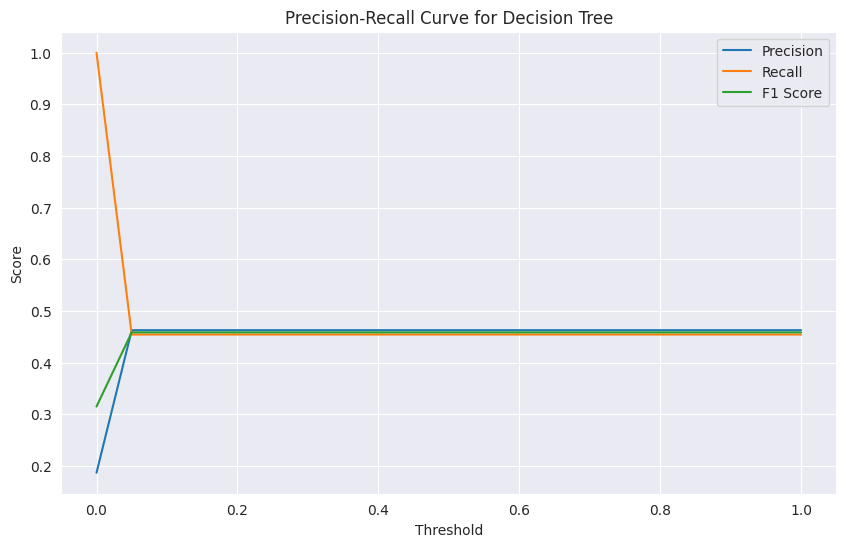


Final Scores at Optimal Threshold:
Accuracy: 0.7993197278911565
F1 Score: 0.4587155963302752
ROC AUC Score: 0.6666032712057817
Precision: 0.46296296296296297
Recall: 0.45454545454545453

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       239
           1       0.46      0.45      0.46        55

    accuracy                           0.80       294
   macro avg       0.67      0.67      0.67       294
weighted avg       0.80      0.80      0.80       294


Confusion Matrix:
[[210  29]
 [ 30  25]]


In [ ]:
# Columns to be encoded
categorical_features = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Age Group', 'MonthlyIncome_bin', 'OverTime']
# Columns to be scaled
numerical_features = X.columns.difference(categorical_features)

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('OneHotEncoder', OneHotEncoder(handle_unknown='ignore'))
])

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Bundle preprocessing for categorical and numerical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Create the pipeline with preprocessing step and classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=10))
])

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Define the parameter grid for GridSearchCV
params_grid = {
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': [None, 10, 20, 30, 40, 50],
    'classifier__min_samples_split': [2, 10, 20],
    'classifier__min_samples_leaf': [1, 5, 10],
    'classifier__max_features': [None, 'sqrt', 'log2']
}

# Define the scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'f1': make_scorer(f1_score),
    'roc_auc': 'roc_auc',
    'precision': make_scorer(precision_score, zero_division=0),
    'recall': make_scorer(recall_score, zero_division=0)
}

# Optimize hyperparameters using GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid=params_grid, scoring=scoring, refit='recall', cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("\n")
print(f'Best parameters found: {best_params} with training data')

# Accessing the scores for each metric
results = grid_search.cv_results_

print("\nBest CV Scores:")
for scorer in scoring:
    best_score = grid_search.best_score_ if scorer == 'accuracy' else max(results[f'mean_test_{scorer}'])
    print(f"Best {scorer}: {best_score}")

# Predict probabilities using the best found parameters and model
best_model = grid_search.best_estimator_
y_pred_prob = best_model.predict_proba(X_test)[:, 1]

##########################################
########## TESTING THRESHOLDS ############
##########################################
# Define a range of thresholds to evaluate
thresholds = np.arange(0.0, 1.05, 0.05)

precision_scores = []
recall_scores = []
f1_scores = []

for threshold in thresholds:
    y_pred_threshold = (y_pred_prob >= threshold).astype(int)
    precision = precision_score(y_test, y_pred_threshold, zero_division=0)
    recall = recall_score(y_test, y_pred_threshold)
    f1 = f1_score(y_test, y_pred_threshold)

    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

# Plot precision-recall curves
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision_scores, label='Precision')
plt.plot(thresholds, recall_scores, label='Recall')
plt.plot(thresholds, f1_scores, label='F1 Score')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall Curve for Decision Tree')
plt.legend()
plt.grid(True)
plt.show()

################################################
########## CHOOSING FINAL THRESHOLD ############
################################################
# Choose an optimal threshold based on the plot
optimal_threshold = 0.55  # Example threshold, adjust based on your plot

# Make final predictions using the optimal threshold
y_pred_optimal = (y_pred_prob >= optimal_threshold).astype(int)

# Calculate and print the final scores
precision_final = precision_score(y_test, y_pred_optimal, zero_division=0)
recall_final = recall_score(y_test, y_pred_optimal)
f1_final = f1_score(y_test, y_pred_optimal)
accuracy_final = accuracy_score(y_test, y_pred_optimal)
roc_auc_final = roc_auc_score(y_test, y_pred_optimal)

print("\nFinal Scores at Optimal Threshold:")
print(f"Accuracy: {accuracy_final}")
print(f"F1 Score: {f1_final}")
print(f"ROC AUC Score: {roc_auc_final}")
print(f"Precision: {precision_final}")
print(f"Recall: {recall_final}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_optimal))
conf_matrix = confusion_matrix(y_test, y_pred_optimal)
print("\nConfusion Matrix:")
print(conf_matrix)

# Naive Bayes
- We want to focus on Recall for this Attrition case. As we  are interested to predict if the employee will be resigning based on certain factors

The Naive Bayes high recall is a desirable outcome for predicting attrition. However, the low precision and moderate overall performance metrics indicate that the model may benefit from additional tuning

# Testing with threshold for Naive Bayes



Best parameters found: {'classifier__var_smoothing': 0.003511191734215131} with training data

Best CV Scores:
Best accuracy: 0.7031531531531531
Best f1: 0.5176003734827264
Best roc_auc: 0.7779003535284943
Best precision: 0.9492063492063492
Best recall: 0.7031531531531531


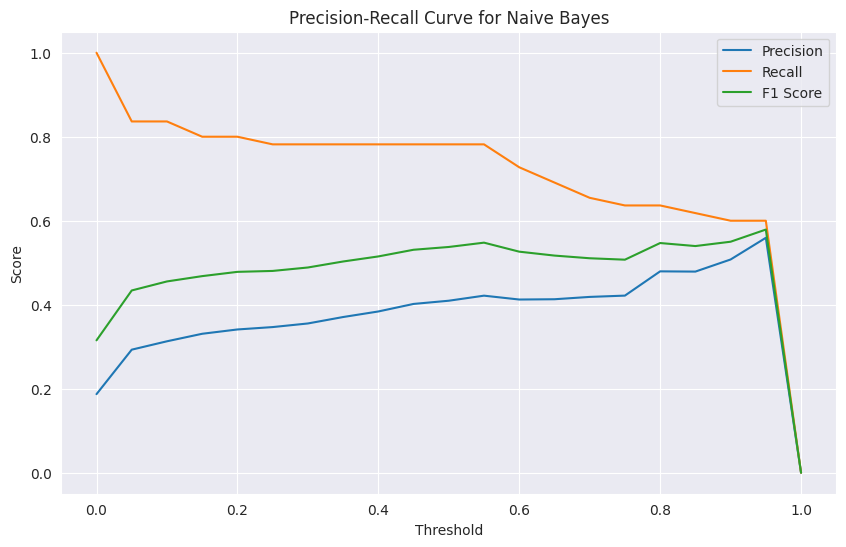


Final Scores at Optimal Threshold:
Accuracy: 0.7585034013605442
F1 Score: 0.5477707006369427
ROC AUC Score: 0.7674781285659946
Precision: 0.4215686274509804
Recall: 0.7818181818181819

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.75      0.84       239
           1       0.42      0.78      0.55        55

    accuracy                           0.76       294
   macro avg       0.68      0.77      0.69       294
weighted avg       0.84      0.76      0.78       294


Confusion Matrix:
[[180  59]
 [ 12  43]]


In [ ]:
################################################################################
##############     REFACOTRING OF CODES USING PIPELINES     ####################
################################################################################

# Columns to be encoded
categorical_features = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Age Group', 'MonthlyIncome_bin', 'OverTime']
# Columns to be scaled
numerical_features = X.columns.difference(categorical_features)

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('OneHotEncoder', OneHotEncoder(handle_unknown='ignore'))
])

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Bundle preprocessing for categorical and numerical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Create the pipeline with preprocessing step, SMOTE, and classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    # ('smote', SMOTE(random_state=15, sampling_strategy='auto')),
    ('classifier', GaussianNB())
])

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

##########################
######## SMOTE ###########
##########################
# Print value counts of y_train before SMOTE
# print("\nValue counts of y_train before SMOTE:")
# print(y_train.value_counts())

# Apply the preprocessing and SMOTE steps manually to print the value counts after SMOTE
# X_train_preprocessed = preprocessor.fit_transform(X_train)
# smote = SMOTE(random_state=15)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train_preprocessed, y_train)

# Print value counts of y_train after SMOTE
# print("\nValue counts of y_train after SMOTE:")
# print(y_train_resampled.value_counts())

# Define the parameter grid for GridSearchCV
params_grid = {
    'classifier__var_smoothing': np.logspace(0,-9, num=100)
}

# Define the scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'f1': make_scorer(f1_score),
    'roc_auc': 'roc_auc',
    'precision': make_scorer(precision_score, zero_division=0),
    'recall': make_scorer(recall_score, zero_division=0)
}

# Optimize hyperparameters using GridSearchCV
# refit parameter in GridSearchCV controls which scoring metric is used to select the best estimator.
# Imbalanced Datasets: Since this dataset is imbalanced and we are concerned about the performance on the minority class,
# we should optimize for F1 score or recall.
grid_search = GridSearchCV(pipeline, param_grid=params_grid, scoring=scoring, refit='recall', cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("\n")
print(f'Best parameters found: {best_params} with training data')

# Accessing the scores for each metric
results = grid_search.cv_results_

print("\nBest CV Scores:")
for scorer in scoring:
    best_score = grid_search.best_score_ if scorer == 'accuracy' else max(results[f'mean_test_{scorer}'])
    print(f"Best {scorer}: {best_score}")

# Predict probabilities using the best found parameters and model
best_model = grid_search.best_estimator_
y_pred_prob = best_model.predict_proba(X_test)[:, 1]


##########################################
########## TESTING THRESHOLDS ############
##########################################
# Define a range of thresholds to evaluate
thresholds = np.arange(0.0, 1.05, 0.05)

precision_scores = []
recall_scores = []
f1_scores = []

for threshold in thresholds:
    y_pred_threshold = (y_pred_prob >= threshold).astype(int)
    precision = precision_score(y_test, y_pred_threshold, zero_division=0)
    recall = recall_score(y_test, y_pred_threshold)
    f1 = f1_score(y_test, y_pred_threshold)

    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

# Plot precision-recall curves
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision_scores, label='Precision')
plt.plot(thresholds, recall_scores, label='Recall')
plt.plot(thresholds, f1_scores, label='F1 Score')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall Curve for Naive Bayes')
plt.legend()
plt.grid(True)
plt.show()


################################################
########## CHOOSING FINAL THRESHOLD ############
################################################
# Choose an optimal threshold based on the plot
optimal_threshold = 0.55  # Example threshold, adjust based on your plot

# Make final predictions using the optimal threshold
y_pred_optimal = (y_pred_prob >= optimal_threshold).astype(int)

# Calculate and print the final scores
precision_final = precision_score(y_test, y_pred_optimal, zero_division=0)
recall_final = recall_score(y_test, y_pred_optimal)
f1_final = f1_score(y_test, y_pred_optimal)
accuracy_final = accuracy_score(y_test, y_pred_optimal)
roc_auc_final = roc_auc_score(y_test, y_pred_optimal)

print("\nFinal Scores at Optimal Threshold:")
print(f"Accuracy: {accuracy_final}")
print(f"F1 Score: {f1_final}")
print(f"ROC AUC Score: {roc_auc_final}")
print(f"Precision: {precision_final}")
print(f"Recall: {recall_final}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_optimal))
conf_matrix = confusion_matrix(y_test, y_pred_optimal)
print("\nConfusion Matrix:")
print(conf_matrix)

# Testing out Backward Eliminiation:


*   Start with all available features
*   In each iteration, remove the least important feature and evaluate the model
*   Continue until a stopping condition is met.

Importance of feature selection:


*   Dimensionality Reduction: high-dimensional datasets with many features can lead to overfitting, increased computational complexity, and decreased model interpretability. Selecting the most relevant features can mitigate these issues  
*   Enhanced model performance: Removing irrelevant or redundant features can improve a model's predictive accuracy, generalization, and robustness.
*   Reduced training time: Fewer features mean faster training times, making it practical to work with large datasets.


In [ ]:
# Replace this with your dataset and labels
X = X_train
y = y_train

# Identify categorical and numeric columns
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()

# Define the preprocessor without imputation
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

# Apply the preprocessor to the dataset
X_processed = preprocessor.fit_transform(X)

# Get the feature names after one-hot encoding and scaling
encoded_categorical_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
all_feature_names = numeric_features + encoded_categorical_feature_names.tolist()

# Convert the processed array back to a DataFrame
X_processed = pd.DataFrame(X_processed, columns=all_feature_names)

# Define the machine learning model
model = GaussianNB()

# Initialize a list with all feature indices
all_features = list(range(X_processed.shape[1]))

# Define the recall threshold to stop
recall_threshold = 0.9

# Define the minimum number of features you want to retain
# min_features_to_retain = 10

while True:
    worst_score = 1.0  # Initialize with a high value
    worst_feature = None

    for feature_idx in all_features:
        # Create a list of features without the current one
        candidate_features = [f for f in all_features if f != feature_idx]

        # Evaluate the model's performance using cross-validation
        scores = cross_val_score(model, X_processed.iloc[:, candidate_features], y, cv=5, scoring='recall')
        mean_score = np.mean(scores)

        # Keep track of the worst-performing feature
        if mean_score < worst_score:
            worst_score = mean_score
            worst_feature = feature_idx

    if worst_score >= recall_threshold or len(all_features) <= 1:
        break

    if worst_feature is not None:
        all_features.remove(worst_feature)
        print(f"Removed Feature: {worst_feature}, Mean Recall: {worst_score:.4f}")

print("Remaining feature indices:", all_features)

Removed Feature: 41, Mean Recall: 0.6592
Removed Feature: 36, Mean Recall: 0.6482
Removed Feature: 48, Mean Recall: 0.5931
Removed Feature: 39, Mean Recall: 0.5602
Removed Feature: 49, Mean Recall: 0.5161
Removed Feature: 40, Mean Recall: 0.4829
Removed Feature: 8, Mean Recall: 0.4446
Removed Feature: 38, Mean Recall: 0.4116
Removed Feature: 21, Mean Recall: 0.3950
Removed Feature: 47, Mean Recall: 0.3677
Removed Feature: 32, Mean Recall: 0.3293
Removed Feature: 52, Mean Recall: 0.3128
Removed Feature: 19, Mean Recall: 0.2802
Removed Feature: 30, Mean Recall: 0.2632
Removed Feature: 45, Mean Recall: 0.2306
Removed Feature: 33, Mean Recall: 0.2195
Removed Feature: 14, Mean Recall: 0.2030
Removed Feature: 23, Mean Recall: 0.2029
Removed Feature: 4, Mean Recall: 0.1919
Removed Feature: 6, Mean Recall: 0.1809
Removed Feature: 10, Mean Recall: 0.1755
Removed Feature: 0, Mean Recall: 0.1755
Removed Feature: 44, Mean Recall: 0.1647
Removed Feature: 22, Mean Recall: 0.1150
Removed Feature: 27,

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py", line 267, in fit
    return self._partial_fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py", line 428, in _partial_fit
    X, y = self._validate_data(X, y, reset=first_call)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 584, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 1106, in check_X_y
    X = check_array(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 778, in check_array
    dtype_orig = np.result_type(*dtypes_orig)
ValueError: at least one array or dtype is required


In [ ]:
# Model perfromace plot function
def model_performance_plot(model) :
    #conf matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    trace1 = go.Heatmap(z = conf_matrix  ,x = ["0 (pred)","1 (pred)"],
                        y = ["0 (true)","1 (true)"],xgap = 2, ygap = 2,
                        colorscale = 'Viridis', showscale  = False)

    #show metrics
    tp = conf_matrix[1,1]
    fn = conf_matrix[1,0]
    fp = conf_matrix[0,1]
    tn = conf_matrix[0,0]
    Accuracy  =  ((tp+tn)/(tp+tn+fp+fn))
    Precision =  (tp/(tp+fp))
    Recall    =  (tp/(tp+fn))
    F1_score  =  (2*(((tp/(tp+fp))*(tp/(tp+fn)))/((tp/(tp+fp))+(tp/(tp+fn)))))

    show_metrics = pd.DataFrame(data=[[Accuracy , Precision, Recall, F1_score]])
    show_metrics = show_metrics.T

    colors = ['gold', 'lightgreen', 'lightcoral', 'lightskyblue']
    trace2 = go.Bar(x = (show_metrics[0].values),
                   y = ['Accuracy', 'Precision', 'Recall', 'F1_score'], text = np.round_(show_metrics[0].values,4),
                    textposition = 'auto',
                   orientation = 'h', opacity = 0.8,marker=dict(
            color=colors,
            line=dict(color='#000000',width=1.5)))

    #plot roc curve
    model_roc_auc = round(roc_auc_score(y_test, y_score) , 3)
    fpr, tpr, t = roc_curve(y_test, y_score)
    trace3 = go.Scatter(x = fpr,y = tpr,
                        name = "Roc : ",
                        line = dict(color = ('rgb(22, 96, 167)'),width = 2), fill='tozeroy')
    trace4 = go.Scatter(x = [0,1],y = [0,1],
                        line = dict(color = ('black'),width = 1.5,
                        dash = 'dot'))

    # Precision-recall curve
    precision, recall, thresholds = precision_recall_curve(y_test, y_score)
    trace5 = go.Scatter(x = recall, y = precision,
                        name = "Precision" + str(precision),
                        line = dict(color = ('lightcoral'),width = 2), fill='tozeroy')

    #subplots
    fig = tls.make_subplots(rows=2, cols=2, print_grid=False,
                        subplot_titles=('Confusion Matrix',
                                        'Metrics',
                                        'ROC curve'+" "+ '('+ str(model_roc_auc)+')',
                                        'Precision - Recall curve'))

    fig.append_trace(trace1,1,1)
    fig.append_trace(trace2,1,2)
    fig.append_trace(trace3,2,1)
    fig.append_trace(trace4,2,1)
    fig.append_trace(trace5,2,2)

    fig['layout'].update(showlegend = False, title = '<b>Model performance</b><br>'+str(model),
                        autosize = False, height = 900,width = 830,
                        plot_bgcolor = 'rgba(240,240,240, 0.95)',
                        paper_bgcolor = 'rgba(240,240,240, 0.95)',
                        margin = dict(b = 195))
    fig["layout"]["xaxis2"].update((dict(range=[0, 1])))
    fig["layout"]["xaxis3"].update(dict(title = "false positive rate"))
    fig["layout"]["yaxis3"].update(dict(title = "true positive rate"))
    fig["layout"]["xaxis4"].update(dict(title = "recall"), range = [0,1.05])
    fig["layout"]["yaxis4"].update(dict(title = "precision"), range = [0,1.05])
    fig.layout.titlefont.size = 14

    py.iplot(fig)